# Hanan Basheer (20B030018)
## Assignment 1

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.integrate import odeint

# Question 1

In [56]:
def vel(r, t):
    x, y = r
    r = (x*x + y*y)**0.5
    u = ((x*x - y*y - 1)*(x*x - y*y) + 4*x*x*y*y)/(r*r*r*r)
    v = -2*(x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

In [57]:
x, y = np.mgrid[-2:8:100j, -5:5:100j]
r = (x*x + y*y)**0.5
u = ((x*x - y*y)*(x*x - y*y -1) + 4*x*x*y*y)/(r*r*r*r)
v = -2*x*y/(r*r*r*r)

In [58]:
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        if r[i][j] < 1:
            u[i][j], v[i][j] = 0, 0

## Velocity Field

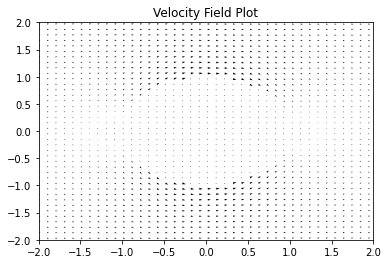

In [59]:
plt.clf()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.title("Velocity Field Plot")
plt.quiver(x, y, u, v)

## Streamlines/Path lines

- Integrate the trajectory of a "particle" starting at some initial condition, ic, for a given amount of time.

$$ \frac{dx}{dt} = u$$

$$ \frac{dy}{dt} = v$$

We are given an initial condition, $ic = (x_0, y_0)$ and integrate it for different times.
Note that once we can do path lines, we can just freeze the velocity at a given time and compute the pathlines to plot them as "streamlines".

In [60]:
times = np.linspace(0, 10, 100)

Text(0.5, 1.0, 'Streamlines Plot')

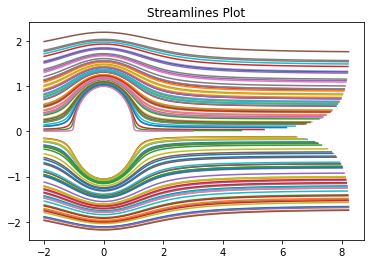

In [61]:
for i in range(100):
    ic = np.array([-2.0, np.random.uniform(-2,2)])
    sol = odeint(vel, ic, times)
    px, py = sol.T
    plt.plot(px, py)
    plt.grid()
plt.title("Streamlines Plot")

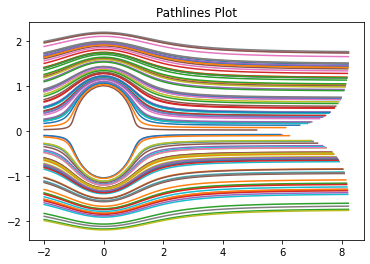

In [62]:
for i in range(100):
    ic = np.array([-2.0, np.random.uniform(-2,2)])
    sol = odeint(vel, ic, times)
    px, py = sol.T
    plt.plot(px, py)
    plt.grid()
    plt.title("Pathlines Plot")

## Streaklines

To do this, we start new particles at different times.  Let us release particles every dt time steps from the point (0, 0) and do so for a total time of $T=n dt$ seconds.
So the first point is integrated to from 0 to T seconds, the second to from dt to T, third from 2*dt to T etc.
So for each particle we must integrate from t=i*dt to T and only plot the final value.
The result will have two values, one at t=0 and one at t=T so we store/plot the last value.

Text(0.5, 1.0, 'Streaklines Plot')

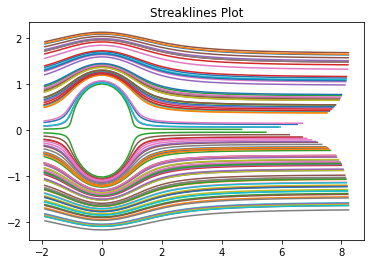

In [63]:
lines = 100
for rep in range(lines):
    ic = np.array([-2.0, np.random.uniform(-2,2)])
    dt = 0.1
    n = 100
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel, ic, [start, T])
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
    plt.grid()
plt.title("Streaklines Plot")

### We can observe that the flow is steady and non-accelarating. Hence the plots of Streamlines, Streaklines and Pathlines are identical.

# Question 2

In [64]:
def vel(r, t):
    x, y = r
    x += t
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

In [65]:
def vel_quiver(x, y, t):
    u = np.zeros_like(x)
    v = np.zeros_like(y)
    for i in range(np.shape(x)[0]):
        for j in range(np.shape(x)[1]):
            u[i,j], v[i,j] = vel((x[i,j], y[i,j]), t)        
    return plt.quiver(x, y, u, v)

In [66]:
x, y = np.mgrid[-2:2:100j,-2:2:100j]

## Velocity Field

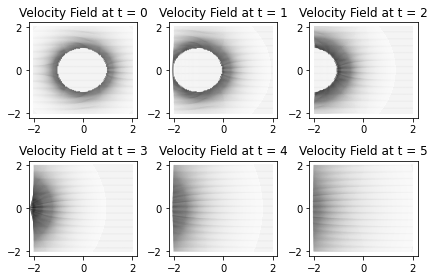

In [79]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    vel_quiver(x, y, i)
    plt.title("Velocity Field at t = " + str(i))
plt.tight_layout(h_pad = 1, w_pad = 1)

## Path lines

- Integrate the trajectory of a "particle" starting at some initial condition, ic, for a given amount of time.

$$ \frac{dx}{dt} = u$$

$$ \frac{dy}{dt} = v$$

Text(0.5, 1.0, 'Pathlines Plot')

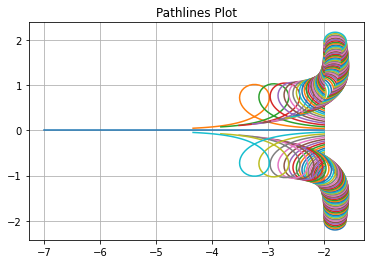

In [80]:
times = np.linspace(0,6,100)
for i in range(100):
    ic = np.array([-2, -2 + i/25])
    sol = odeint(vel,ic,times)
    px, py = sol.T
    plt.plot(px, py)
plt.grid()
plt.title("Pathlines Plot")

## Streamlines

We are given an initial condition, $ic = (x_0, y_0)$ and integrate it for different times.
Note that once we can do path lines, we can just freeze the velocity at a given time and compute the pathlines to plot them as "streamlines".

#### t = 0

In [168]:
def vel_freeze_zero(r, t):
    x, y = r
    x += 0
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

Text(0.5, 1.0, 'Streamlines Plot at t = 0')

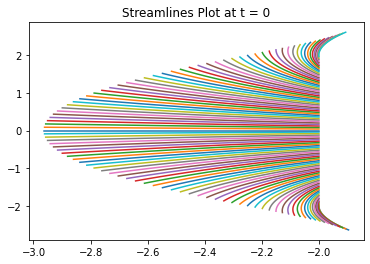

In [169]:
times = np.linspace(0,6,100)
for i in range(100):
    ic = np.array([-2, -2 + i/25])
    sol0 = odeint(vel_freeze_zero, ic, times)
    px, py = sol0.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 0") 

#### t = 1

In [170]:
def vel_freeze_one(r, t):
    x, y = r
    x += 1
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

Text(0.5, 1.0, 'Streamlines Plot at t = 1')

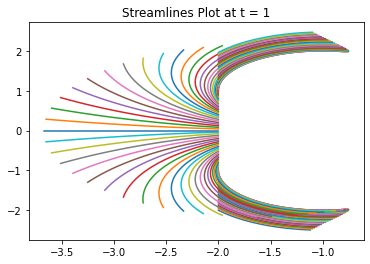

In [171]:
times = np.linspace(0,6,100)
for i1 in range(100):
    ic = np.array([-2, -2 + i1/25])
    sol1 = odeint(vel_freeze_one, ic, times)
    px, py = sol1.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 1") 

#### t = 2

In [172]:
def vel_freeze_two(r, t):
    x, y = r
    x += 2
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Temp/ipykernel_18212/2626537664.py:5: RuntimeWarning: invalid value encountered in double_scalars
  u = (y*y - x*x)/(r*r*r*r)
C:\Users\hanub\AppData\Local\Temp/ipykernel_18212/2626537664.py:6: RuntimeWarning: invalid value encountered in double_scalars
  v = -2 * (x*y/(r*r*r*r))
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done

Text(0.5, 1.0, 'Streamlines Plot at t = 2')

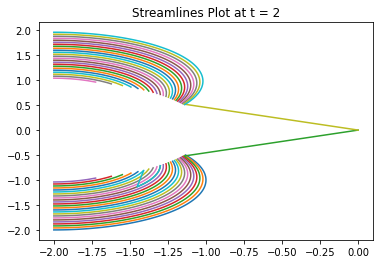

In [173]:
times = np.linspace(0,6,100)
for i2 in range(100):
    ic = np.array([-2, -2 + i2/25])
    sol2 = odeint(vel_freeze_two, ic, times)
    px, py = sol2.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 2") 

#### t = 3

In [185]:
def vel_freeze_three(r, t):
    x, y = r
    x += 3
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Df

Text(0.5, 1.0, 'Streamlines Plot at t = 3')

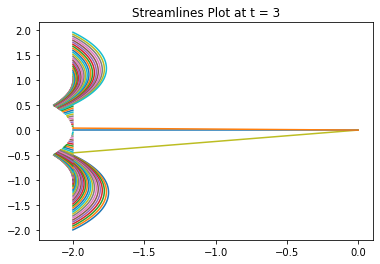

In [187]:
times = np.linspace(0,6,100)
for i3 in range(100):
    ic = np.array([-2, -2 + i3/25])
    sol3 = odeint(vel_freeze_three, ic, times)
    px, py = sol3.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 3")

#### t = 4

In [176]:
def vel_freeze_four(r, t):
    x, y = r
    x += 4
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Df

Text(0.5, 1.0, 'Streamlines Plot at t = 4')

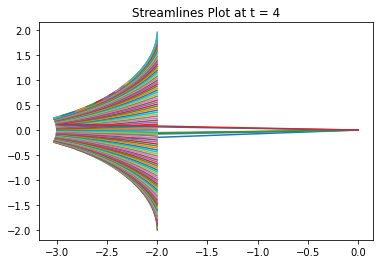

In [183]:
times = np.linspace(0,6,100)
for i4 in range(100):
    ic = np.array([-2, -2 + i4/25])
    sol4 = odeint(vel_freeze_four, ic, times)
    px, py = sol4.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 4")

#### t = 5

In [178]:
def vel_freeze_five(r, t):
    x, y = r
    x += 5
    r = (x*x + y*y)**0.5
    u = (y*y - x*x)/(r*r*r*r)
    v = -2 * (x*y/(r*r*r*r))
    if r<1:
        return np.array([0, 0])
    return np.array([u, v])

Text(0.5, 1.0, 'Streamlines Plot at t = 5')

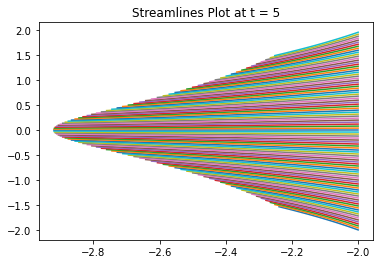

In [179]:
times = np.linspace(0,6,100)
for i5 in range(100):
    ic = np.array([-2, -2 + i5/25])
    sol5 = odeint(vel_freeze_five, ic, times)
    px, py = sol5.T
    plt.plot(px, py)
plt.title("Streamlines Plot at t = 5")

## Streaklines

To do this, we start new particles at different times.  Let us release particles every dt time steps from the point (0, 0) and do so for a total time of $T=n dt$ seconds.
So the first point is integrated to from 0 to T seconds, the second to from dt to T, third from 2*dt to T etc.
So for each particle we must integrate from t=i*dt to T and only plot the final value.
The result will have two values, one at t=0 and one at t=T so we store/plot the last value.

C:\Users\hanub\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 1.0, 'Streaklines Plot')

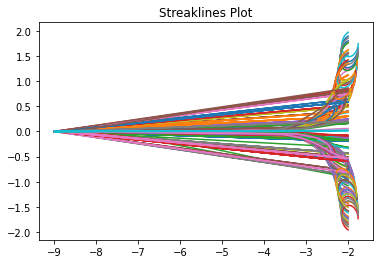

In [188]:
lines = 100
for rep in range(lines):
    ic = np.array([-2.0, np.random.uniform(-2,2)])
    dt = 0.1
    n = 100
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel, ic, [start, T])
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
    plt.grid()
plt.title("Streaklines Plot")